# 04 · Conditional Agent

Exercise 4


In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1 : int
    number2 : int
    operation : chr
    finalNumber : int
    number3 : int
    number4 : int
    operation2 : chr
    finalNumber2 : int

In [17]:
def adder(state: AgentState) -> AgentState:
    state["finalNumber"] = state["finalNumber"] + state["number1"] + state["number2"]
    return state

def subtractor(state: AgentState) -> AgentState:
    state["finalNumber"] = state["finalNumber"] + state["number1"] - state["number2"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    operation = state["operation"]
    if operation == "+":
        return "additon_operation"
    elif operation == "-":
        return "subtraction_operation"

def adder2(state: AgentState) -> AgentState:
    state["finalNumber2"] = state["finalNumber2"] + state["number3"] + state["number4"]
    return state

def subtractor2(state: AgentState) -> AgentState:
    state["finalNumber2"] = state["finalNumber2"] + state["number3"] - state["number4"]
    return state

def decide_next_node2(state: AgentState) -> AgentState:
    operation = state["operation2"]
    if operation == "+":
        return "additon_operation2"
    elif operation == "-":
        return "subtraction_operation2"

In [18]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state)
graph.add_node("router2", lambda state: state)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "additon_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")
graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "additon_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

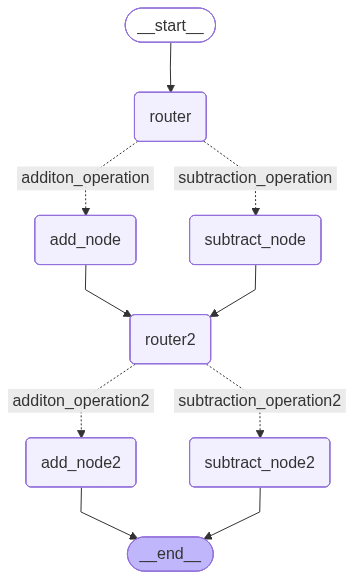

In [19]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
result = app.invoke({"number1": 10, "operation": "-", "number2": 5, "number3": 7, "operation2": "+", "number4": 2, "finalNumber": 0, "finalNumber2": 0})
result["finalNumber"], result["finalNumber2"]

(5, 9)